# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 52s 110ms/step - loss: 2.2842 - accuracy: 0.1392 - val_loss: 2.2512 - val_accuracy: 0.2411
Epoch 2/12
469/469 [==============================] - 55s 118ms/step - loss: 2.2333 - accuracy: 0.2253 - val_loss: 2.1915 - val_accuracy: 0.3642
Epoch 3/12
469/469 [==============================] - 51s 108ms/step - loss: 2.1731 - accuracy: 0.3028 - val_loss: 2.1159 - val_accuracy: 0.5083
Epoch 4/12
469/469 [==============================] - 51s 108ms/step - loss: 2.0967 - accuracy: 0.3766 - val_loss: 2.0197 - val_accuracy: 0.6048
Epoch 5/12
469/469 [==============================] - 53s 113ms/step - loss: 1.9996 - accuracy: 0.4424 - val_loss: 1.8994 - val_accuracy: 0.6729
Epoch 6/12
469/469 [==============================] - 52s 111ms/step - loss: 1.8821 - accuracy: 0.4973 - val_loss: 1.7525 - val_accuracy: 0.7156
Epoch 7/12
469/469 [==============================] - 52s 111ms/step - loss: 1.7439 - accuracy: 0.5459 - val_loss: 1.5795 - val_ac

In [12]:
import numpy as np
# Noise is added here
# The max value of the noise should not grossly surpass 1.0

train_noise = np.random.normal(loc = 0, scale = .2, size = (60000, 28, 28, 1))
train_noise

array([[[[ 1.36900571e-01],
         [-3.14278230e-01],
         [ 3.04140036e-02],
         ...,
         [ 6.08809723e-02],
         [-8.28852708e-02],
         [-3.03610614e-02]],

        [[ 1.02730731e-01],
         [ 5.62015832e-03],
         [ 1.05959290e-01],
         ...,
         [ 2.14505896e-01],
         [-1.45366238e-01],
         [ 1.63095084e-01]],

        [[ 1.23656230e-01],
         [ 1.04752305e-01],
         [ 2.15466984e-01],
         ...,
         [ 1.96519031e-01],
         [ 1.63855715e-01],
         [-6.95976677e-02]],

        ...,

        [[-8.59723736e-02],
         [-2.15232220e-01],
         [-3.16672277e-01],
         ...,
         [-5.71741737e-02],
         [ 3.54125120e-01],
         [ 4.39933609e-02]],

        [[-1.36584254e-01],
         [-5.50509133e-02],
         [ 5.34802568e-01],
         ...,
         [-1.48137704e-01],
         [-1.73527248e-01],
         [ 3.45534873e-01]],

        [[-1.42076587e-01],
         [-6.01727776e-02],
         [

In [13]:
# using scale of .2 results in a max train_noise value of slightly greater than 1
np.max(train_noise)

1.154928618709291

In [14]:
noisy_train = x_train + train_noise
noisy_train

array([[[[ 1.36900571e-01],
         [-3.14278230e-01],
         [ 3.04140036e-02],
         ...,
         [ 6.08809723e-02],
         [-8.28852708e-02],
         [-3.03610614e-02]],

        [[ 1.02730731e-01],
         [ 5.62015832e-03],
         [ 1.05959290e-01],
         ...,
         [ 2.14505896e-01],
         [-1.45366238e-01],
         [ 1.63095084e-01]],

        [[ 1.23656230e-01],
         [ 1.04752305e-01],
         [ 2.15466984e-01],
         ...,
         [ 1.96519031e-01],
         [ 1.63855715e-01],
         [-6.95976677e-02]],

        ...,

        [[-8.59723736e-02],
         [-2.15232220e-01],
         [-3.16672277e-01],
         ...,
         [-5.71741737e-02],
         [ 3.54125120e-01],
         [ 4.39933609e-02]],

        [[-1.36584254e-01],
         [-5.50509133e-02],
         [ 5.34802568e-01],
         ...,
         [-1.48137704e-01],
         [-1.73527248e-01],
         [ 3.45534873e-01]],

        [[-1.42076587e-01],
         [-6.01727776e-02],
         [

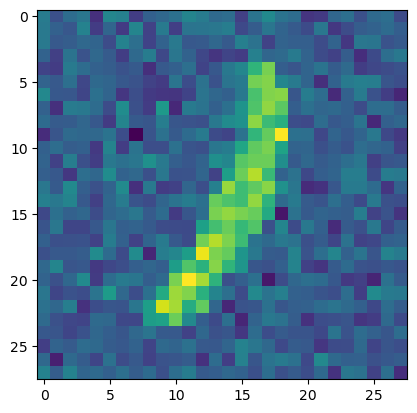

In [16]:
import matplotlib.pyplot as  plt
%matplotlib inline

plt.imshow(noisy_train[78].reshape(28,28))

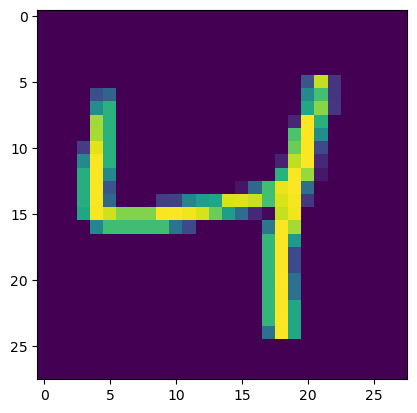

In [17]:
# try another image to compare without and with noise
plt.imshow(x_train[2].reshape(28,28))

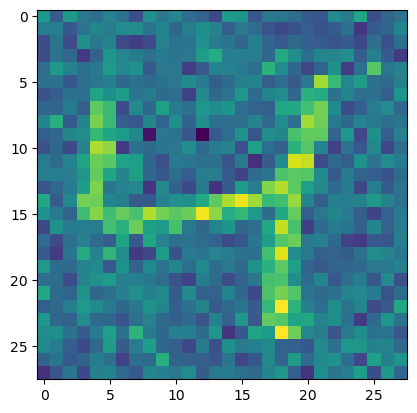

In [18]:
plt.imshow(noisy_train[2].reshape(28,28)) 

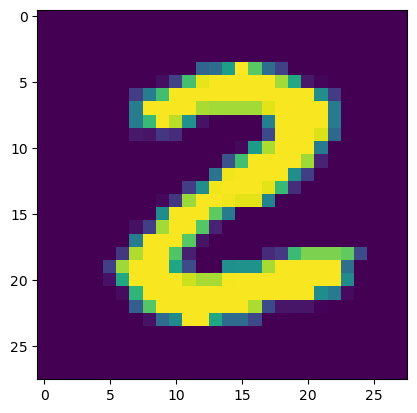

In [19]:
# try one more
plt.imshow(x_train[25].reshape(28,28))

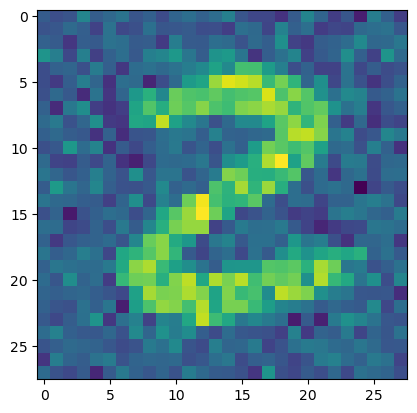

In [20]:
plt.imshow(noisy_train[25].reshape(28,28)) # noise looks different across several images

In [24]:
# create test noise
test_noise = np.random.normal(loc = 0, scale = .2, size = (10000, 28, 28, 1))

test_noise

array([[[[ 5.74095293e-02],
         [ 3.65973535e-02],
         [ 3.08659798e-01],
         ...,
         [-8.68872260e-02],
         [-5.95692848e-02],
         [ 1.42986898e-01]],

        [[ 1.86351897e-01],
         [-2.38629184e-02],
         [ 9.17606347e-02],
         ...,
         [ 2.26547835e-01],
         [ 2.44944543e-01],
         [ 2.09495958e-01]],

        [[-9.90445183e-02],
         [ 2.45855761e-01],
         [ 2.72031551e-01],
         ...,
         [ 1.05428164e-01],
         [ 1.25338095e-02],
         [-6.22095193e-02]],

        ...,

        [[-1.50888548e-01],
         [ 2.24125722e-01],
         [-3.96119782e-02],
         ...,
         [ 2.78411686e-02],
         [ 4.00300720e-02],
         [-2.48257161e-01]],

        [[-2.45025018e-02],
         [ 1.07301445e-01],
         [-8.38804479e-02],
         ...,
         [ 1.27760018e-01],
         [ 2.39090569e-01],
         [-1.79610058e-02]],

        [[ 1.37634518e-01],
         [-2.85669787e-01],
         [

In [25]:
np.max(test_noise) # close to 1

1.0356686040207677

In [26]:
noisy_test = x_test + test_noise

In [28]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [29]:
# without noise
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 48s 101ms/step - loss: 2.2834 - accuracy: 0.1427 - val_loss: 2.2405 - val_accuracy: 0.3389
Epoch 2/12
469/469 [==============================] - 50s 107ms/step - loss: 2.2157 - accuracy: 0.2745 - val_loss: 2.1570 - val_accuracy: 0.5967
Epoch 3/12
469/469 [==============================] - 53s 114ms/step - loss: 2.1301 - accuracy: 0.3905 - val_loss: 2.0492 - val_accuracy: 0.6803
Epoch 4/12
469/469 [==============================] - 50s 107ms/step - loss: 2.0175 - accuracy: 0.4742 - val_loss: 1.9085 - val_accuracy: 0.7315
Epoch 5/12
469/469 [==============================] - 53s 113ms/step - loss: 1.8795 - accuracy: 0.5300 - val_loss: 1.7322 - val_accuracy: 0.7683
Epoch 6/12
469/469 [==============================] - 50s 106ms/step - loss: 1.7146 - accuracy: 0.5722 - val_loss: 1.5302 - val_accuracy: 0.7878
Epoch 7/12
469/469 [==============================] - 50s 106ms/step - loss: 1.5456 - accuracy: 0.6014 - val_loss: 1.3264 - val_ac

In [30]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [31]:
# with noise
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(noisy_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(noisy_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 50s 105ms/step - loss: 2.2908 - accuracy: 0.1226 - val_loss: 2.2576 - val_accuracy: 0.2301
Epoch 2/12
469/469 [==============================] - 52s 110ms/step - loss: 2.2450 - accuracy: 0.1957 - val_loss: 2.2038 - val_accuracy: 0.4308
Epoch 3/12
469/469 [==============================] - 52s 112ms/step - loss: 2.1916 - accuracy: 0.2798 - val_loss: 2.1340 - val_accuracy: 0.5798
Epoch 4/12
469/469 [==============================] - 53s 113ms/step - loss: 2.1201 - accuracy: 0.3573 - val_loss: 2.0439 - val_accuracy: 0.6638
Epoch 5/12
469/469 [==============================] - 52s 112ms/step - loss: 2.0302 - accuracy: 0.4211 - val_loss: 1.9302 - val_accuracy: 0.7103
Epoch 6/12
469/469 [==============================] - 52s 111ms/step - loss: 1.9183 - accuracy: 0.4762 - val_loss: 1.7897 - val_accuracy: 0.7389
Epoch 7/12
469/469 [==============================] - 60s 127ms/step - loss: 1.7889 - accuracy: 0.5192 - val_loss: 1.6263 - val_ac

With noise, 82% accuracy, compared to about 85% accuracy without noise.

In [32]:
# try setting loss = categorical_crossentropy and optimizer = adam as mentioned in slack
# again, without noise

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# without noise
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/12
469/469 [==============================] - 55s 115ms/step - loss: 0.2405 - accuracy: 0.9259 - val_loss: 0.0519 - val_accuracy: 0.9830
Epoch 2/12
469/469 [==============================] - 52s 112ms/step - loss: 0.0858 - accuracy: 0.9746 - val_loss: 0.0378 - val_accuracy: 0.9872
Epoch 3/12
469/469 [==============================] - 50s 108ms/step - loss: 0.0620 - accuracy: 0.9809 - val_loss: 0.0394 - val_accuracy: 0.9875
Epoch 4/12
469/469 [==============================] - 56s 120ms/step - loss: 0.0515 - accuracy: 0.9842 - val_loss: 0.0306 - val_accuracy: 0.9902
Epoch 5/12
469/469 [==============================] - 54s 116ms/step - loss: 0.0417 - accuracy: 0.9867 - val_loss: 0.0322 - val_accuracy: 0.9907
Epoch 6/12
469/469 [==============================] - 50s 107ms/step - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.0290 - val_accuracy: 0.9910
Epoch 7/12
469/469 [==============================] - 50s 107ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0292 - val_ac

Much higher accuracy using Adam than Adadelta as optimizer.

In [33]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# with noise
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(noisy_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(noisy_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 50s 106ms/step - loss: 0.2943 - accuracy: 0.9102 - val_loss: 0.0668 - val_accuracy: 0.9800
Epoch 2/12
469/469 [==============================] - 51s 109ms/step - loss: 0.1100 - accuracy: 0.9666 - val_loss: 0.0519 - val_accuracy: 0.9835
Epoch 3/12
469/469 [==============================] - 49s 105ms/step - loss: 0.0818 - accuracy: 0.9759 - val_loss: 0.0457 - val_accuracy: 0.9847
Epoch 4/12
469/469 [==============================] - 49s 104ms/step - loss: 0.0688 - accuracy: 0.9792 - val_loss: 0.0418 - val_accuracy: 0.9867
Epoch 5/12
469/469 [==============================] - 50s 106ms/step - loss: 0.0580 - accuracy: 0.9818 - val_loss: 0.0381 - val_accuracy: 0.9871
Epoch 6/12
469/469 [==============================] - 50s 107ms/step - loss: 0.0510 - accuracy: 0.9834 - val_loss: 0.0430 - val_accuracy: 0.9862
Epoch 7/12
469/469 [==============================] - 52s 111ms/step - loss: 0.0442 - accuracy: 0.9866 - val_loss: 0.0370 - val_ac

On noisy data, it looks like the convolutional network has slightly higher accuracy at 99.18% vs 99.15% without noise.

In [ ]:
# Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. 
# Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` 
# and keep track of the `accuracy` for training and validation and plot these results.

In [34]:
scale_vals = [.1, .5, 1.0, 2.0, 4.0]
scores = []


model = Sequential()
scale_val = .1

for scale_val in scale_vals:
    
    # train noise
    train_noise = np.random.normal(loc = 0, scale = scale_val, size = (60000, 28, 28, 1))
    # test noise
    test_noise = np.random.normal(loc = 0, scale = scale_val, size = (10000, 28, 28, 1))
    
    # the data, shuffled and split between train and test sets
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    if backend.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    
    noisy_train = x_train + train_noise
    noisy_test = x_test + test_noise
    
    # with noise
    batch_size = 128
    num_classes = 10
    epochs = 12

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])

    model.fit(noisy_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(noisy_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    scores.append(score)
    
    scale_val += .1
    

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               1179776   
                                                      

In [35]:
scores

[[0.029297994449734688, 0.9919999837875366],
 [0.05383559688925743, 0.9855999946594238],
 [0.14361509680747986, 0.9611999988555908],
 [1.053114652633667, 0.8294000029563904],
 [2.1916141510009766, 0.2888999879360199]]

In [37]:
accuracies = [i[1] for i in scores]
accuracies

[0.9919999837875366,
 0.9855999946594238,
 0.9611999988555908,
 0.8294000029563904,
 0.2888999879360199]

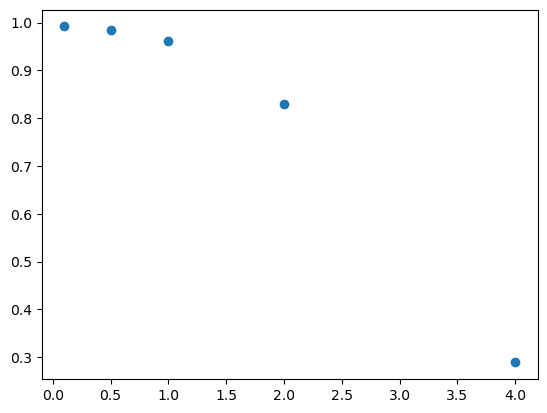

In [38]:
# plot scores
plt.scatter(scale_vals, accuracies)

Similar to the Multilayer Perceptron model used last week, accuracy decreases as scale values increase. The specific accuracy levels are higher by each scale value for the convolutional models compared to the multilayer perceptron models used last week.